<a href="https://colab.research.google.com/github/VRAHUL8499/exercise-/blob/main/movie_shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np


importing dataset

In [120]:
df = pd.read_csv("tv_shows.csv")

In [121]:
df.head(3)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1


In [122]:
df.tail(6)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
5362,5362,5712,Best Job Ever,2018,NaN,NaN,10/100,0,0,0,1,1
5363,5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1
5367,5367,5717,Fearless Adventures with Jack Randall,2018,NaN,NaN,10/100,0,0,0,1,1


analyzing the data


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


in the above data , important sections like  age , imdb and rotten tamaotoes are not in numeric  type need to convert that numeric types

note : object type means : string

coverting age in numeric

In [124]:
df['Age'] = df['Age'].str.replace('+', '')
df['Age'] = df['Age'].str.replace('all',"5") #so for now if the age is all let say above 5 can see
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

#note the above code must run only once , it will convert the age value to numeric in main data set

<ipython-input-124-8fa49564502e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Age'] = df['Age'].str.replace('+', '')


In [125]:
df['Age']

0       18.0
1       16.0
2       18.0
3       18.0
4       16.0
        ... 
5363     NaN
5364     NaN
5365     NaN
5366     NaN
5367     NaN
Name: Age, Length: 5368, dtype: float64

convert imbd to numeric


In [126]:

df['IMDb'] = pd.to_numeric(df['IMDb'].str.replace('/10', ''), errors='coerce')
#note the above code must run only once , it will convert the  value to numeric in main data set

In [127]:
df['IMDb']

0       9.4
1       8.7
2       9.0
3       8.8
4       8.8
       ... 
5363    NaN
5364    NaN
5365    NaN
5366    NaN
5367    NaN
Name: IMDb, Length: 5368, dtype: float64

Rotten Tomatoes

In [128]:
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'].str.replace('/100', ''), errors='coerce')
#note the above code must run only once , it will convert the  value to numeric in main data set

In [129]:
df['Rotten Tomatoes']

0       100
1        96
2        95
3        94
4        93
       ... 
5363     10
5364     10
5365     10
5366     10
5367     10
Name: Rotten Tomatoes, Length: 5368, dtype: int64

Checking and filling null values

In [130]:
df.isna().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

Deciding whether to remove rows with NaN values or fill them with mean or median values depends on various factors, including the nature of the data, the amount of missing data, the impact of the missing values on your analysis, and the specific requirements of your analysis. Here are some considerations to help you make a decision:

lets choose filling them with mean and median for now


In [131]:
df['Age'].fillna(0, inplace=True) #age is crucial ryt for age unknown lets say 0 to be taken
df['IMDb'].fillna(df['IMDb'].mean(), inplace=True)
df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].mean(), inplace=True)



In [132]:
df.isna().sum()

Unnamed: 0         0
ID                 0
Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
dtype: int64

No null values now

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5368 non-null   int64  
 1   ID               5368 non-null   int64  
 2   Title            5368 non-null   object 
 3   Year             5368 non-null   int64  
 4   Age              5368 non-null   float64
 5   IMDb             5368 non-null   float64
 6   Rotten Tomatoes  5368 non-null   int64  
 7   Netflix          5368 non-null   int64  
 8   Hulu             5368 non-null   int64  
 9   Prime Video      5368 non-null   int64  
 10  Disney+          5368 non-null   int64  
 11  Type             5368 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 503.4+ KB


Checking duplicate rows

In [134]:
duplicate_rows = df[df.duplicated(keep=False)]
print("Complete Duplicate Rows: ")
print(duplicate_rows)

Complete Duplicate Rows: 
Empty DataFrame
Columns: [Unnamed: 0, ID, Title, Year, Age, IMDb, Rotten Tomatoes, Netflix, Hulu, Prime Video, Disney+, Type]
Index: []


The output "Empty DataFrame" with no rows and columns listed under the header indicates that there are no complete duplicate rows in your DataFrame. This means that each row in your DataFrame is unique based on all the columns, and there are no rows that have identical values across all columns.

if any duplicate values you can use below code

In [135]:
df.drop_duplicates(keep='first', inplace=True)

You might wander what is inplcae =True , so whenever you can to make changes on already uploaded data you should add that

Removing unwanted columns

In [136]:
df.drop(columns=['Unnamed: 0' ,'ID'])

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,Breaking Bad,2008,18.0,9.400000,100,1,0,0,0,1
1,Stranger Things,2016,16.0,8.700000,96,1,0,0,0,1
2,Attack on Titan,2013,18.0,9.000000,95,1,1,0,0,1
3,Better Call Saul,2015,18.0,8.800000,94,1,0,0,0,1
4,Dark,2017,16.0,8.800000,93,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5363,Paradise Islands,2017,0.0,7.086019,10,0,0,0,1,1
5364,Mexico Untamed,2018,0.0,7.086019,10,0,0,0,1,1
5365,Wild Centeral America,2020,0.0,7.086019,10,0,0,0,1,1
5366,Wild Russia,2018,0.0,7.086019,10,0,0,0,1,1


In [137]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5368 non-null   int64  
 1   ID               5368 non-null   int64  
 2   Title            5368 non-null   object 
 3   Year             5368 non-null   int64  
 4   Age              5368 non-null   float64
 5   IMDb             5368 non-null   float64
 6   Rotten Tomatoes  5368 non-null   int64  
 7   Netflix          5368 non-null   int64  
 8   Hulu             5368 non-null   int64  
 9   Prime Video      5368 non-null   int64  
 10  Disney+          5368 non-null   int64  
 11  Type             5368 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 545.2+ KB


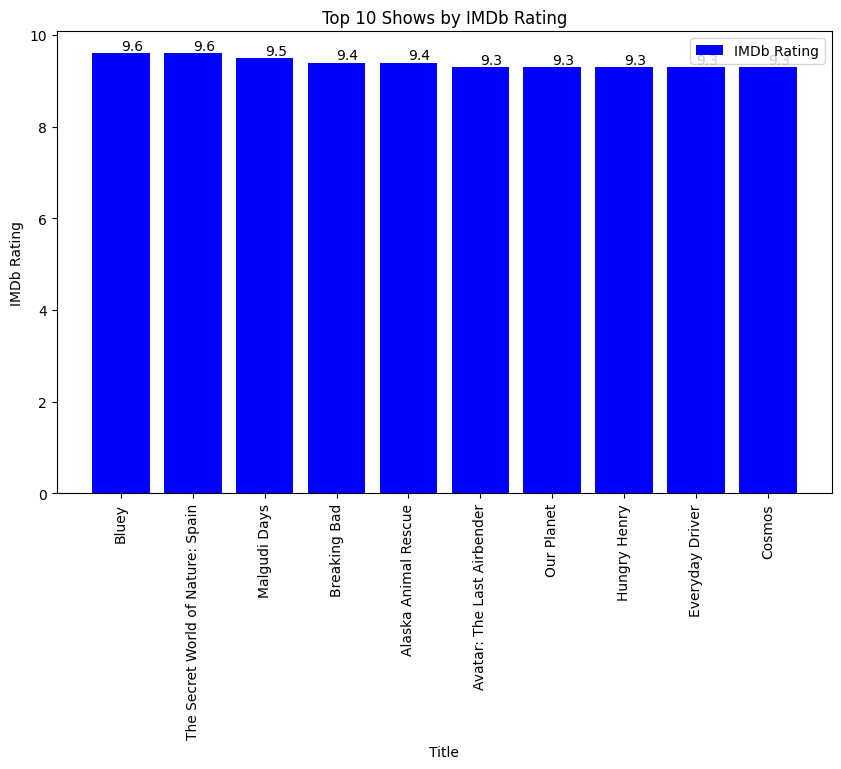

In [138]:
import matplotlib.pyplot as plt

# for decending order
df_sorted_imdb = df.sort_values('IMDb', ascending=False).head(10)


plt.figure(figsize=(10, 6))
bars = plt.bar(df_sorted_imdb['Title'], df_sorted_imdb['IMDb'], color='b', label='IMDb Rating')
plt.xlabel('Title')
plt.ylabel('IMDb Rating')
plt.title('Top 10 Shows by IMDb Rating')
plt.xticks(rotation=90)
plt.legend()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.show()


In [139]:
df.columns


Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')

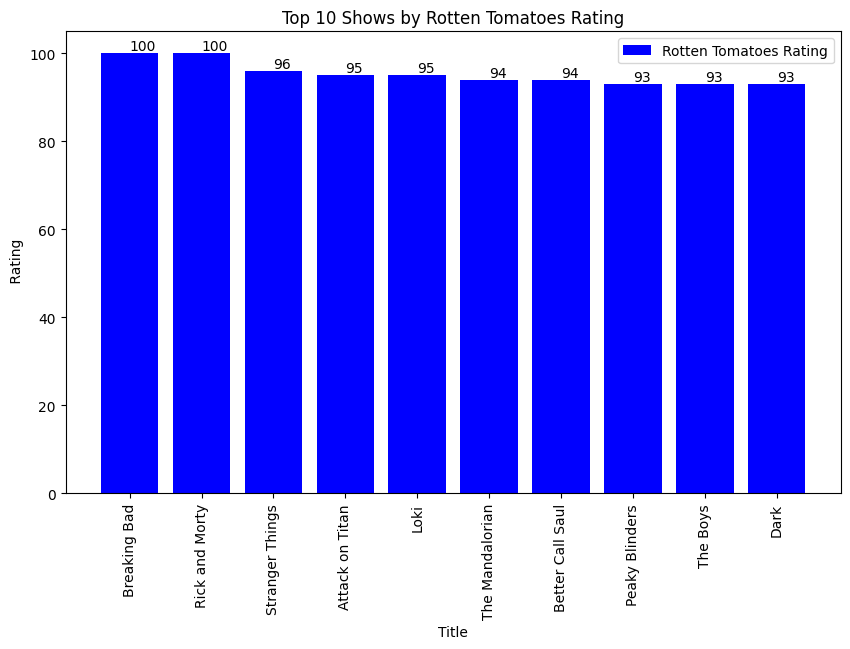

In [140]:
import matplotlib.pyplot as plt


df_sorted_imdb = df.sort_values('Rotten Tomatoes', ascending=False).head(10) # for decending order


plt.figure(figsize=(10, 6))
bars = plt.bar(df_sorted_imdb['Title'], df_sorted_imdb['Rotten Tomatoes'], color='b', label='Rotten Tomatoes Rating')
plt.xlabel('Title')
plt.ylabel(' Rating')
plt.title('Top 10 Shows by Rotten Tomatoes Rating')
plt.xticks(rotation=90)
plt.legend()


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.show()
